#Stable diffusion Through API (no GPU required)

# Install dependencies Libraries

In [3]:
#%pip install ..
!pip install stability-sdk -q
!pip install libmagic #apt-get if linux based

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4286 sha256=8e2135ad8da0180ba26b2694fbab46b1ec3070ca06d5cd64a0087819d913e779
  Stored in directory: /root/.cache/pip/wheels/f8/8a/32/b5e5458427778faf24ad32526c49e2dc5d20f32c96bf6ce236
Successfully built libmagic


## Authentication with API Key as Environment Variable

In [6]:
import getpass, os

#to get API Key, visit https://beta.dreamstudio.ai/membership
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key : ')

Enter your API Key : ··········


In [7]:
import io
import os
import warnings

from IPython.display import display #display images
from PIL import Image #image processing
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


In [8]:
#Setup Authentication

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True, #if something goes on
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


In [9]:
input_prompt = 'Batman dark knight rises 4K HD wallpaper! '

INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 1b7da292-31b2-47de-88a7-34965ade0f04 in 0.24s
INFO:stability_sdk.client:Got keepalive 1b7da292-31b2-47de-88a7-34965ade0f04 in 1.47s
INFO:stability_sdk.client:Got answer 1b7da292-31b2-47de-88a7-34965ade0f04 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.22s


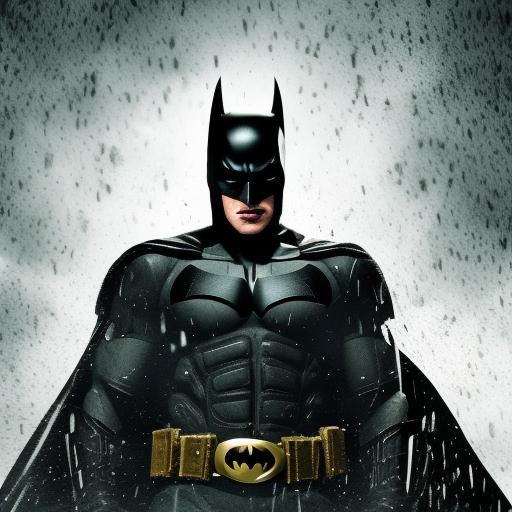

In [10]:
# the object returned is a python generator
answers = stability_api.generate(
    prompt = input_prompt,
    seed=0, # if provided, specifying a random seed makes results deterministic
    steps=20, # defaults to 30 if not specified
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)